*Prepared for the course "TDPS22: Data Science Programming" at Jönköping University, Teacher: [Marcel Bollmann](mailto:marcel.bollmann@ju.se)*

# Assignment 1: Data Science Workflows in Python

In this assignment, you will analyze a dataset about vehicle registrations in Sweden.  The data comes directly from the statistical database of [Statistics Sweden (SCB)](https://scb.se/en/) and contains "new registrations of passenger cars by region and by type of fuel" between January 2006 and March 2022. 

### Instructions

- The assignment is structured into parts, each of which consists of one or more tasks and/or questions.  You should provide your code to arrive at the solutions _directly below_ the respective task/question in this notebook.  You can add as many cells as you want and perform as many intermediate steps as you want, but **the last output of each task/question should clearly show the answer** to that task or question.


- You are allowed to consult any resources (books/websites/exercises), but each assignment group should **work on the assignment on their own.**   You may ask questions about specific Pandas/Seaborn/Scikit-learn/etc. functionality or about the previous exercises on Canvas, but **you may _not_ directly share answers for tasks in this assignment.**


- You should **submit your finished assignment as a single Jupyter notebook file** through Canvas. ***Before you submit,*** make sure that your notebook runs correctly from start to finish. In Jupyter Notebook, you can do this by going to the menu, choosing "Kernel", then "Restart & Run All", and verify that all cells show the expected output.


### Grading

- This assignment is graded Pass/Fail.


- In order of importance, the criteria for passing are **demonstrating an understanding** of how to implement data science tasks in Python, **correctness** of the solution, as well as **clean coding style**. You do _not_ need to find the "shortest" or "most elegant" solution to each problem. It is more important that you show an understanding of how to manipulate, visualize, and model data in Python; arrive at a correct solution; and that I can understand your reasoning for what you did and why you did it. I encourage you to _use comments in your code_ to explain your approach when the code gets more complex.


- To _pass_ this assignment, you must provide a solution for _all of the tasks below_.  You can still pass if some of your solutions are not entirely correct or lacking in coding style, as long as they show a general understanding of how to approach the problem.

- - -

In [2]:
# optional:
# %load_ext rich

In [4]:
%pwd

'C:\\Users\\admin\\Desktop\\Programming\\Python\\pythonProject1\\notebooks\\university_notebooks'

In [2]:
### SETUP -- You should NOT need to modify this cell, but you can add your own imports later
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv("../../data/sweden_vehicles/sweden-vehicle.csv")
df

,region,fuel,2006M01,2006M02,2006M03,2006M04,2006M05,2006M06,2006M07,2006M08,...,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03
0,Stockholm,petrol,2824,3431,4291,4872,5819,5648,3450,4087,...,3194,1607,1566,1511,1338,1316,1430,1226,1261,1702
1,Stockholm,diesel,884,895,1022,1059,1160,1059,783,1060,...,2151,713,975,1136,755,789,998,819,949,1121
2,Stockholm,electricity,1,0,0,0,0,0,0,0,...,3160,695,1331,2415,1576,1923,3306,1612,1879,3415
3,Stockholm,electric hybrid,101,87,131,102,95,118,72,108,...,946,452,446,420,408,435,506,471,523,653
4,Stockholm,plug-in hybrid,0,0,0,0,0,0,0,0,...,5204,1854,2070,1961,2084,2571,2988,2171,2372,2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Norrbotten,electric hybrid,3,0,2,1,3,2,1,5,...,49,38,28,35,33,24,37,68,51,56
164,Norrbotten,plug-in hybrid,0,0,0,0,0,0,0,0,...,59,29,38,57,68,53,37,37,51,54
165,Norrbotten,ethanol/ethanol flexifuel,35,31,33,25,26,25,23,61,...,7,11,4,6,5,5,5,0,5,8
166,Norrbotten,gas/gas flex,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


- - - 
## Part 1: Transform the dataset from wide form into long form!

There is currently one column for each month in the dataset ("2006M01", "2006M02", ...). This is an example of _wide-form data,_ because one variable (= the date of registration) is expressed in the column index instead of table cells. This can make it challenging to perform analyses based on this variable. It is often much easier to work with _long-form data_ instead, so the first thing you should do is to **convert the DataFrame into long form.**

I suggest making a single "date" column containing a Pandas `datetime` object, but you can also make "month"/"year" columns instead or in addition. The important aspect is that you transform the dataset into long form, so that after this conversion, your dataset looks approximately like this:

|       | **region** | **fuel**         | **date**    | **vehicles** |
|-------|------------|------------------|-------------|--------------|
| **0** | Stockholm  | petrol           | 2006-01-01  | 2824         |
| **1** | Stockholm  | diesel           | 2006-01-01  | 884          |
| **2** | Stockholm  | electricity      | 2006-01-01  | 1            |
| ...   | ...        | ...              | ...         | ...          |

- <span class="badge">Task</span> **Provide code to convert `df` into long form!**

In [24]:
# YOUR CODE HERE
import datetime
long_form_date = []
long_form_columns = list(df.columns[2:])
for i, column_name in enumerate(long_form_columns):
    long_form_columns[i] = f'{column_name[:4]}-{column_name[-2:]}-01'
    long_form_date.append(datetime.datetime.strptime(long_form_columns[i], '%Y-%m-%d').date())

2006-01-01


In [ ]:
# id_cols = ['region', 'fuel']

# dfs=[]
# for col in df.columns:
#     if col not in id_cols:
#         df_part = df[id_cols]
#         df_part['date'] = col
#         df_part['vehicles'] = df[col]

#         dfs.append(df_part)
# pd.concat(dfs)

In [3]:
# PANDAS MELT AND PIVOT TABLES
df_long = df.melt(id_vars=['region', 'fuel'], var_name='date', value_name='vehicle')

In [4]:
df_long['date'] = df_long['date'].apply(lambda x: f'{x[:4]}-{x[-2:]}-01')
# for x in df_long['date']:
#     df_long['date'] = datetime.datetime.strptime(x, '%Y-%m-%d').date()
    
df_long

,region,fuel,date,vehicle
0,Stockholm,petrol,2006-01-01,2824
1,Stockholm,diesel,2006-01-01,884
2,Stockholm,electricity,2006-01-01,1
3,Stockholm,electric hybrid,2006-01-01,101
4,Stockholm,plug-in hybrid,2006-01-01,0
...,...,...,...,...
32755,Norrbotten,electric hybrid,2022-03-01,56
32756,Norrbotten,plug-in hybrid,2022-03-01,54
32757,Norrbotten,ethanol/ethanol flexifuel,2022-03-01,8
32758,Norrbotten,gas/gas flex,2022-03-01,0


In [66]:
month_values_dict = {}

dataframes = []
for column_name in df.columns[2:]:
    df_first_part = df[['region', 'fuel']]
    month_values_dict[column_name] = df[column_name].tolist()
    string_to_date = f'{column_name[:4]}-{column_name[-2:]}-01'
    df_first_part['date'] = datetime.datetime.strptime(string_to_date, '%Y-%m-%d').date()
    df_first_part['vehicle'] = month_values_dict[column_name]
    dataframes.append(df_first_part)
new_df = pd.concat(dataframes)

new_df

<ipython-input-66-bb91919b8d00>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_part['date'] = datetime.datetime.strptime(string_to_date, '%Y-%m-%d').date()
<ipython-input-66-bb91919b8d00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_part['vehicle'] = month_values_dict[column_name]


,region,fuel,date,vehicle
0,Stockholm,petrol,2006-01-01,2824
1,Stockholm,diesel,2006-01-01,884
2,Stockholm,electricity,2006-01-01,1
3,Stockholm,electric hybrid,2006-01-01,101
4,Stockholm,plug-in hybrid,2006-01-01,0
...,...,...,...,...
163,Norrbotten,electric hybrid,2022-03-01,56
164,Norrbotten,plug-in hybrid,2022-03-01,54
165,Norrbotten,ethanol/ethanol flexifuel,2022-03-01,8
166,Norrbotten,gas/gas flex,2022-03-01,0


- - -

> **Note:** If you can't fully solve Part 1, or you want to work on the other tasks first, you may uncomment the lines in the cell below to load the already-converted dataset for use with the next tasks.

In [4]:
# df_long = pd.read_csv("data/sweden-vehicle-longform.csv")
# df_long["date"] = df_long["date"].transform(pd.to_datetime)

- - - 
## Part 2: Answer questions about the data using Pandas functionality!

Answer each of the following questions by using Pandas functionality. You can also use other built-in Python functions, but you should _not_ use any visualizations yet to answer the questions in this part. You can use either the original (wide-form) DataFrame, or the transformed (long-form) DataFrame from Task 1, or both, whatever you feel is easier for the question at hand.

1. <span class="badge">Task</span> **How many different fuel types** are represented in the dataset, and what are they?

In [74]:
# YOUR CODE HERE
print(df_long['fuel'].unique(), len(df_long['fuel'].unique()))

['petrol' 'diesel' 'electricity' 'electric hybrid' 'plug-in hybrid'
 'ethanol/ethanol flexifuel' 'gas/gas flex' 'other fuels'] 8


2. <span class="badge">Task</span> **How many different regions** are represented in the dataset, and what are they?

In [75]:
# YOUR CODE HERE
print(df_long['region'].unique(), len(df_long['region'].unique()))

['Stockholm' 'Uppsala' 'Södermanland' 'Östergötland' 'Jönköping'
 'Kronoberg' 'Kalmar' 'Gotland' 'Blekinge' 'Skåne' 'Halland'
 'Västra Götaland' 'Värmland' 'Örebro' 'Västmanland' 'Dalarna' 'Gävleborg'
 'Västernorrland' 'Jämtland' 'Västerbotten' 'Norrbotten'] 21


3. <span class="badge">Task</span> **How many vehicle registrations _in total_** does the dataset contain?

In [76]:
# YOUR CODE HERE
df_long['vehicle'].sum()

5275089

4. <span class="badge">Task</span> **How many vehicle registrations _by fuel type_** does the dataset contain?

In [90]:
# YOUR CODE HERE
df_long.groupby('fuel')['vehicle'].sum()

fuel
diesel                       2256769
electric hybrid               184066
electricity                   141366
ethanol/ethanol flexifuel     230878
gas/gas flex                   67440
other fuels                      488
petrol                       2148110
plug-in hybrid                245972
Name: vehicle, dtype: int64

5. <span class="badge">Task</span> **What was the _most common fuel type_** among vehicles registered in Stockholm in 2006? What was it in 2021? (You can either give code that prints the answers directly, or produce a table from which you can read off the answers & add a sentence with the answers.)

In [126]:
# YOUR CODE HERE
df_long['year'] = df_long['date'].str[:4]
df_grouped = df_long.groupby(['year', 'fuel'])['vehicle'].sum()
#df_long.columns
df_grouped.head(50)
print(df_grouped[df_grouped.index.get_level_values(0) == '2021'].idxmax(), df_grouped[df_grouped.index.get_level_values(0) == '2006'].idxmax())

('2021', 'petrol') ('2006', 'petrol')


6. <span class="badge">Task</span> **When was the first _plug-in hybrid_ vehicle** registered in Sweden, and **where?** (You can either give code that prints the answer directly, or produce a table from which you can read off the answer & add a sentence with the answer.)

In [20]:
# YOUR CODE HERE
mask1 = (df_long['fuel'] == 'plug-in hybrid')
mask2 = (df_long['vehicle'] > 0)
mask = mask1 & mask2

In [26]:
df_long[mask][['region', 'date']].head(1)

,region,date
12436,Stockholm,2012-03-01


- - - 
## Part 3: Visualize the registrations of different fuel types over time in Sweden!

Your goal is to show how the registration of vehicles _by fuel type_ developed over the timespan of this dataset. You can do this with a _line plot,_ where the $x$-axis is for the date, the $y$-axis is for the number of vehicles registered, and lines of different colors/styles represent the different fuel types. Since we want to look at the data for all of Sweden, your visualization should show the _total registrations_ for all counties (i.e., the **sum** of registrations over all counties).

1. <span class="badge">Task</span> **Produce a line plot** as described above.

   (_Note:_ If you use Seaborn, you might want to turn off the confidence interval that is plotted by default.)

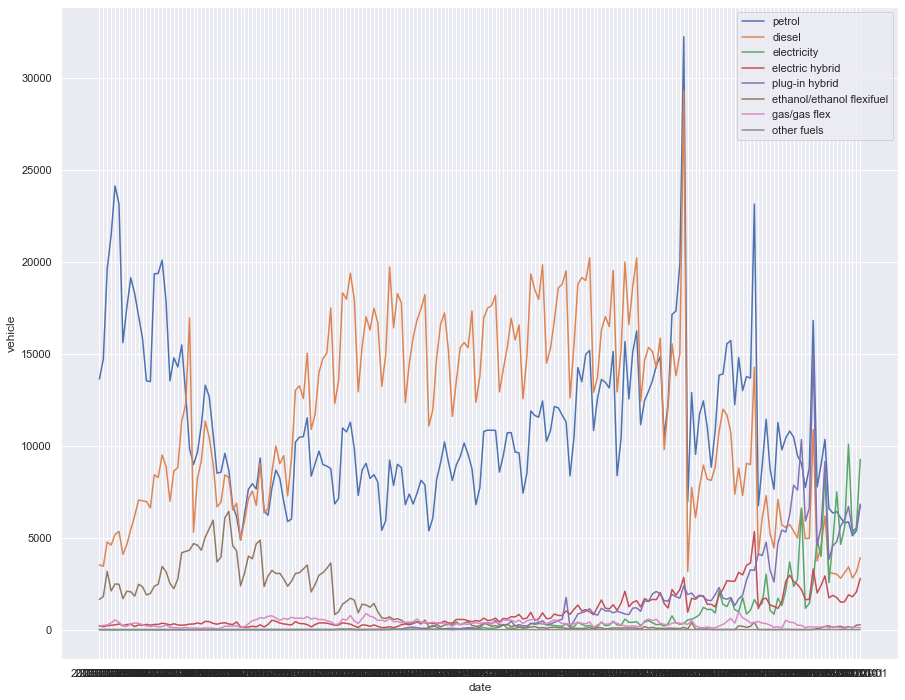

In [49]:
# YOUR CODE HERE
plt.figure(figsize=(15,12))

df_grouped = df_long.groupby(['date', 'fuel']).sum()
for fuel_type in df_long['fuel'].unique():
    df_fuel_type = df_grouped[df_grouped.index.get_level_values('fuel') == fuel_type]
    
    sns.lineplot(
        x=df_fuel_type.index.get_level_values('date'), 
        y=df_fuel_type['vehicle'], 
        label=fuel_type,
        ci=None
    )


In [79]:

plt.figure(figsize=(25,12))

sns.lineplot(
        x=df_grouped.index.get_level_values('date'),
        y=df_grouped['vehicle'],
        hue=df_grouped.index.get_level_values('fuel'),
        ci=None
    )

KeyError: 'Level fuel not found'

<Figure size 1800x864 with 0 Axes>

2. <span class="badge">Task</span> **Aggregate the data and produce a second plot that only has _four_ fuel type categories as follows:**
   - 'petrol' (same as before)
   - 'diesel' (same as before)
   - 'electric or hybrid' (contains 'electricity', 'electric hybrid', 'plug-in hybrid')
   - 'other' (contains 'ethanol/ethanol flexifuel', 'gas/gas flex', 'other fuels')

In [63]:
# YOUR CODE HERE
df_long['fuel_categorized'] = df_long['fuel'].replace(dict.fromkeys(['electricity', 'electric hybrid', 'plug-in hybrid'], 'electric or hybrid'))
df_long['fuel_categorized'] = df_long['fuel_categorized'].replace(dict.fromkeys(['ethanol/ethanol flexifuel', 'gas/gas flex', 'other fuels'], 'other'))

32710                 other
32711                 other
32712                petrol
32713                diesel
32714    electric or hybrid
32715    electric or hybrid
32716    electric or hybrid
32717                 other
32718                 other
32719                 other
32720                petrol
32721                diesel
32722    electric or hybrid
32723    electric or hybrid
32724    electric or hybrid
32725                 other
32726                 other
32727                 other
32728                petrol
32729                diesel
32730    electric or hybrid
32731    electric or hybrid
32732    electric or hybrid
32733                 other
32734                 other
32735                 other
32736                petrol
32737                diesel
32738    electric or hybrid
32739    electric or hybrid
32740    electric or hybrid
32741                 other
32742                 other
32743                 other
32744                petrol
32745               

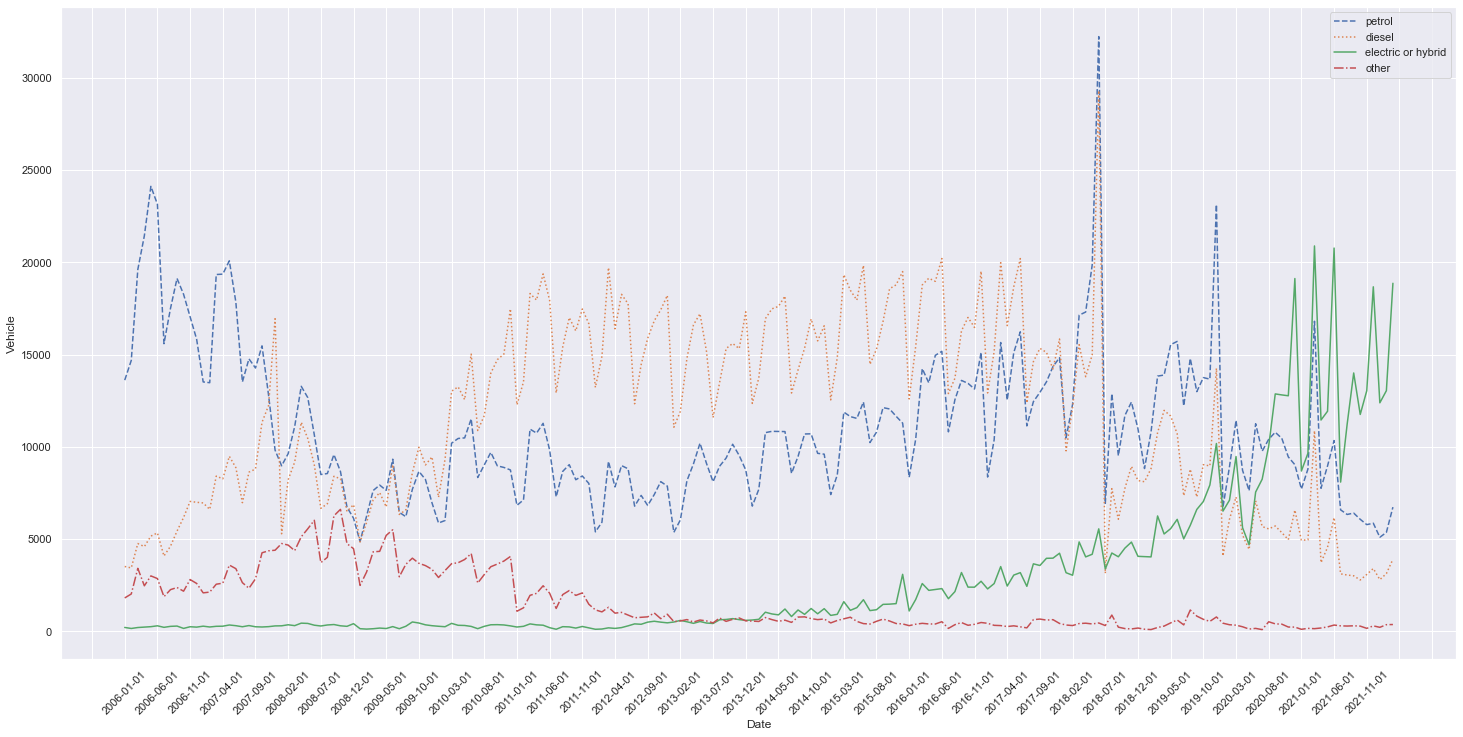

In [92]:
import matplotlib.ticker as ticker
plt.figure(figsize=(25,12))

df_grouped = df_long.groupby(['date', 'fuel_categorized']).sum()
lss = ['dashed', 'dotted', 'solid', 'dashdot']

for fuel_type, ls in zip(df_long['fuel_categorized'].unique(), lss):
    df_fuel_type = df_grouped[df_grouped.index.get_level_values('fuel_categorized') == fuel_type]
    
    sns.lineplot(
        x=df_fuel_type.index.get_level_values('date'), 
        y=df_fuel_type['vehicle'], 
        label=fuel_type,
        ci=None,
        linestyle=ls
    ).xaxis.set_major_locator(ticker.MultipleLocator(5))
    
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Vehicle')
plt.show()

3. <span class="badge">Task</span> **Clean up and tweak the styling of the previous plot**, including at least the following:
   - Titles on the axes and the legend should be properly capitalized.
   - The lines should be distinguished by _both_ color and line styles.
   - The legend should be placed so that it does not obstruct/cover up any part of the plotted lines.

   You can change any other property too—such as color palette, figure size, etc.—if you believe it improves the overall appearance and readability of the plot.

In [13]:
# YOUR CODE HERE

- - - 
## Part 4: Perform and plot Gaussian regressions of _diesel_ vehicle registrations!

We are now looking at a subset of the data you plotted in Part 3: the total number of vehicles registered in Sweden each month which are **"diesel" vehicles.** Your goal is to **perform a regression with Gaussian basis functions** on this subset of the data and **plot the regression and the original data points** in a single plot. (_Note:_ You may copy and re-use code to create the Gaussian features from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).)

- <span class="badge">Task</span> **Train a regression model using Gaussian basis functions** on the total number of registered _diesel_ vehicles per month.  You may choose the number of Gaussian features and whether or not to use any regularization.  Provide your code that trains this model on the data.

In [14]:
# YOUR CODE HERE

- <span class="badge">Task</span> **Produce a visualization that contains:**

   - a **scatter plot** of the total number of registered _diesel_ vehicles per month, where the $x$-axis is the date, and the $y$-axis is the total number of diesel vehicles registered in that month;
   - a **line plot** on top of the scatter plot that shows the predictions of the Gaussian regression.

   For better readability, **make the line plot a different color** from the scatter points. (You do _not_ need to perform any other layout tweaks for this task.)

In [15]:
# YOUR CODE HERE

- - - 
## Part 5: Analyze the popularity of _electric-or-hybrid_ vehicles in Jönköping in March 2022!

Your goal is to analyze how popular vehicles with electric-or-hybrid fuel types are, as measured by the number of vehicle registrations, compared to those with other fuel types.  Since counties differ a lot by population size, you should not compare _absolute_ numbers of registrations, but rather the _percentage_ of electric-or-hybrid cars compared to the other fuel types.  Concretely, you should analyze:

- **how Jönköping compares** to other counties
- in the **percentage of vehicle registrations that are "electric or hybrid"** _(use the definition of "electric or hybrid" vehicles from Task 3.2)_
- in **March 2022.**

Your analysis should allow you to answer the following questions:

- Was the percentage of registered electric-or-hybric cars in Jönköping higher or lower than in, e.g., Stockholm?
- How much higher is the percentage in Jönköping compared to the county with the lowest rate of electric-or-hybrid cars?
- How much lower is the percentage in Jönköping compared to the county with the highest rate of electric-or-hybrid cars?

<span class="badge">Task</span> **Produce a table or visualization that is suitable for answering these questions.**  You are free to solve this task in any way you want; picking a suitable format (table vs. plot; which plot type; etc.) for showing your analysis is part of your task.

In [16]:
# YOUR CODE HERE